<a href="https://colab.research.google.com/github/miky0020/mikhay/blob/main/Gaussian_Blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noise reduction (Gaussian Smoothing)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [16]:
from google.colab import files
f = files.upload()

Saving istockphoto-477799262-1024x1024.png to istockphoto-477799262-1024x1024.png


In [17]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# check width, height and channel
img = skimage.io.imread('istockphoto-477799262-1024x1024.png')
print(f"Width: {img.shape[1]}")
print(f"Height: {img.shape[0]}")
print(f"Channel: {img.shape[2]}")



Width: 1024
Height: 683
Channel: 4


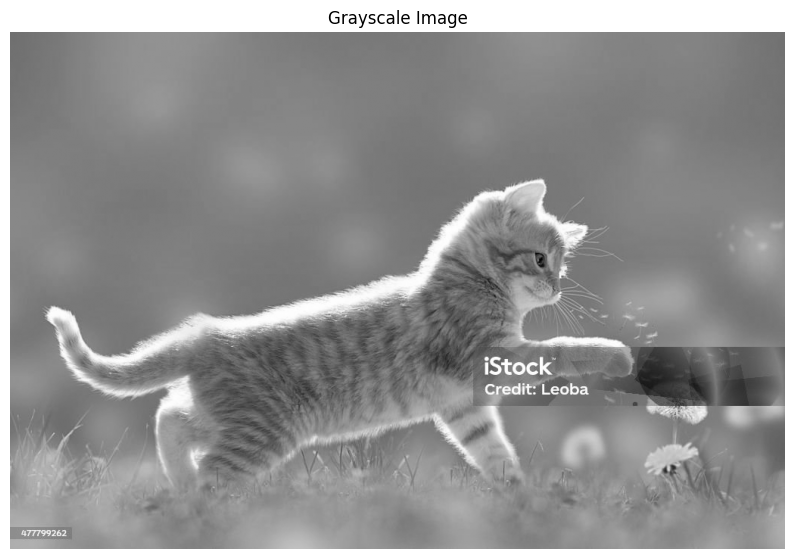

In [20]:
# Show image
plt.figure(figsize=(10, 10))

# Convert RGBA to grayscale manually
# Extract RGB channels (assuming the 4th channel is alpha)
rgb_img = img[:, :, :3]

# Manual grayscale conversion using luminosity method
# Each pixel's grayscale value is calculated as a weighted sum of R, G, B
gray_img = np.zeros((rgb_img.shape[0], rgb_img.shape[1]), dtype=np.uint8)
for i in range(rgb_img.shape[0]):
    for j in range(rgb_img.shape[1]):
        r = rgb_img[i, j, 0]
        g = rgb_img[i, j, 1]
        b = rgb_img[i, j, 2]
        gray_img[i, j] = int(0.299 * r + 0.587 * g + 0.114 * b)

# Display the converted grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("istockphoto-477799262-1024x1024.png")

if img is None:
    print("Image not loaded")
else:
    # BGR to RGB (manual swap)
    height, width, _ = img.shape
    rgb = np.zeros((height, width, 3), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            b = img[i][j][0]
            g = img[i][j][1]
            r = img[i][j][2]

            rgb[i][j][0] = r
            rgb[i][j][1] = g
            rgb[i][j][2] = b

    # Manual grayscale conversion
    gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r = rgb[i][j][0]
            g = rgb[i][j][1]
            b = rgb[i][j][2]

            gray_value = int(0.299*r + 0.587*g + 0.114*b)
            gray[i][j] = gray_value




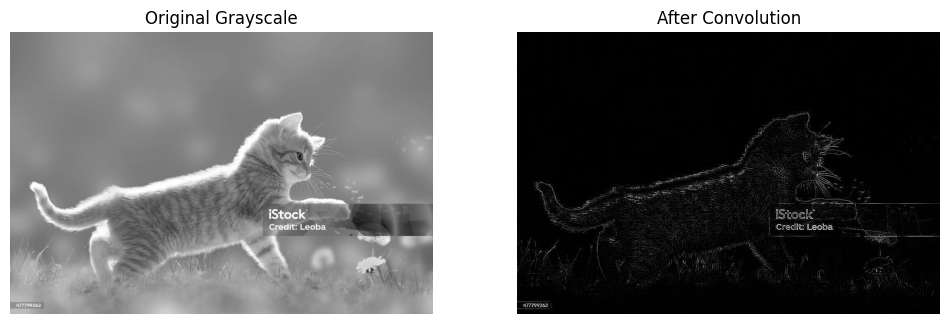

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img_path = "istockphoto-477799262-1024x1024.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Image not loaded from {img_path}. Check the file path.")
else:
    # Define a 3x3 convolution kernel (Edge Detection)
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

    # Apply convolution
    convolved = cv2.filter2D(img, -1, kernel)

    # Show images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved, cmap='gray')
    plt.title('After Convolution')
    plt.axis('off')

    plt.show()

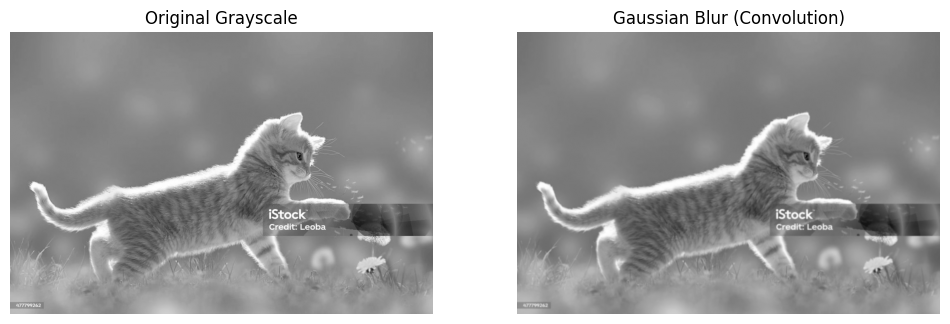

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read grayscale image
img_path = "istockphoto-477799262-1024x1024.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image was loaded successfully
if img is None:
    print(f"Error: Image not loaded from {img_path}. Check the file path.")
else:
    # Gaussian kernel generator
    def gaussian_kernel(size, sigma):
        ax = np.linspace(-(size // 2), size // 2, size)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
        return kernel / np.sum(kernel)

    # Create 5x5 Gaussian kernel
    kernel = gaussian_kernel(5, 1.0)

    # Apply convolution
    gaussian_blur = cv2.filter2D(img, -1, kernel)

    # Show results using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gaussian_blur, cmap='gray')
    plt.title('Gaussian Blur (Convolution)')
    plt.axis('off')

    plt.show()